In [1]:
# Import all the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data sets 
df = pd.read_csv("Global Health Dataset.csv")

In [3]:
# Displaying the first 5 rows
print(df.head())

     Country  Year         Disease Name Disease Category  Prevalence Rate (%)  \
0      Italy  2013              Malaria      Respiratory                 0.95   
1     France  2002                Ebola        Parasitic                12.46   
2     Turkey  2015             COVID-19          Genetic                 0.91   
3  Indonesia  2011  Parkinson's Disease       Autoimmune                 4.68   
4      Italy  2013         Tuberculosis          Genetic                 0.83   

   Incidence Rate (%)  Mortality Rate (%) Age Group Gender  \
0                1.55                8.42      0-18   Male   
1                8.63                8.75       61+   Male   
2                2.35                6.22     36-60   Male   
3                6.29                3.99      0-18  Other   
4               13.59                7.01       61+   Male   

   Population Affected  ...  Hospital Beds per 1000  Treatment Type  \
0               471007  ...                    7.58      Medication  

In [4]:
# checking the data structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

In [5]:
# Checking the missin values
print(df.isnull().sum())

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


In [6]:
# Checking the summary statistics
print(df.describe())

                 Year  Prevalence Rate (%)  Incidence Rate (%)  \
count  1000000.000000       1000000.000000      1000000.000000   
mean      2011.996999            10.047992            7.555005   
std          7.217287             5.740189            4.298947   
min       2000.000000             0.100000            0.100000   
25%       2006.000000             5.090000            3.840000   
50%       2012.000000            10.040000            7.550000   
75%       2018.000000            15.010000           11.280000   
max       2024.000000            20.000000           15.000000   

       Mortality Rate (%)  Population Affected  Healthcare Access (%)  \
count      1000000.000000       1000000.000000         1000000.000000   
mean             5.049919        500735.427363              74.987835   
std              2.859427        288660.116648              14.436345   
min              0.100000          1000.000000              50.000000   
25%              2.580000        250491.

In [7]:
# Checking the duplicate rows
print(df.duplicated().sum())

0


In [8]:
# Finding the dimension (rows and column) of the DataFrame
print("Database Dimension: ", df.shape)

Database Dimension:  (1000000, 22)


In [9]:
# Size of the Database
print("Size of Database: ", df.size)

Size of Database:  22000000


In [10]:
print(df.columns)

Index(['Country', 'Year', 'Disease Name', 'Disease Category',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)',
       'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type',
       'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment',
       'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)',
       'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)'],
      dtype='object')


In [11]:
# Handling the missing value
threshold = len(df) * 0.5
df = df.dropna(thresh = threshold, axis = 1)

In [12]:
# Fill the missing numerical values with median
num_cols = df.select_dtypes(include = ['float64', 'int64']).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

In [13]:
# Filling the categorical value with mode
cat_cols = df.select_dtypes(include = ['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [14]:
# Now conforming the no duplicate values
print(df.isnull().sum())

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


In [15]:
# Handling the duplicate values
# checking for the duplicate rows
print("Duplicated Rows: ", df.duplicated().sum())

# Remove the duplicate rows
df = df.drop_duplicates()

Duplicated Rows:  0


In [16]:
# Correct the datatypes
# Converting the columns like dates to datetime and categorical data to categories
# Convert date columns to date time formate
df['Year'] = pd.to_datetime(df['Year'])

# Convert categorical columns to category type
df[cat_cols] = df[cat_cols].astype('category')

# Verify changes
print(df.dtypes)

Country                                     category
Year                                  datetime64[ns]
Disease Name                                category
Disease Category                            category
Prevalence Rate (%)                          float64
Incidence Rate (%)                           float64
Mortality Rate (%)                           float64
Age Group                                   category
Gender                                      category
Population Affected                            int64
Healthcare Access (%)                        float64
Doctors per 1000                             float64
Hospital Beds per 1000                       float64
Treatment Type                              category
Average Treatment Cost (USD)                   int64
Availability of Vaccines/Treatment          category
Recovery Rate (%)                            float64
DALYs                                          int64
Improvement in 5 Years (%)                   f

In [17]:
print(df.columns)


Index(['Country', 'Year', 'Disease Name', 'Disease Category',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)',
       'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type',
       'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment',
       'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)',
       'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)'],
      dtype='object')


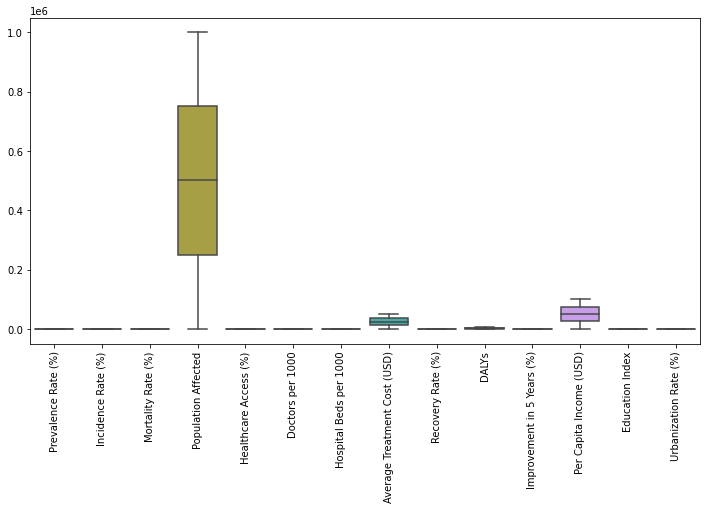

In [18]:
# Now handling Outliers
# Plot the box plot for detecting the outliers
plt.figure(figsize = (12, 6))
sns.boxplot(data = df[num_cols])
plt.xticks(rotation = 90)
plt.show()

In [19]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns


In [20]:
# Remove the outliers using the statical IQR (Interquartile Range)
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [21]:
# Remove the outlier
df = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]


In [22]:
print("Dataset Shape After Removing Outliers:", df.shape)

Dataset Shape After Removing Outliers: (1000000, 22)


In [25]:
# Now the main factor of Standardization and Normalization
# Standardization:- use for the Linear Regression model like KNN,SVM
# Now import the libraries from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Normalization:- Using for the models like Neural Networks and Distance based Networks

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [28]:
# Now saving the CLeaned and Preprocessing Data
df.to_csv("cleaned_healthcare_market_trends.csv", index = False)
print("Data Cleaning Completed. Cleaned file saved!")

Data Cleaning Completed. Cleaned file saved!
